# Tanzanian faulty pumps prediction

## Problem statement
In Tanzania, access to clean and potable water is essential for the health and well-being of its citizens. However, many water pumps 
across the country are faulty, leading to water shortages and posing significant health risks to communities. To address this issue 
and promote access to clean water, we aim to develop a predictive model that can identify faulty water pumps based on various 
features such as pump age, location, type, and condition. By accurately predicting which water pumps are faulty, authorities and
organizations can prioritize maintenance and repair efforts, ensuring that clean and safe water is readily available to all 
Tanzanians.
 Stakeholder:
The Ministry of Water in Tanzania is a key stakeholder in addressing the issue of faulty water pumps and promoting access to clean
 and potable water across the country. As the government body responsible for water resource management and infrastructure
 development, the Ministry plays a crucial role in ensuring that water supply systems are well-maintained and functional.
 By leveraging predictive modeling to identify faulty water pumps, the Ministry can efficiently allocate resources for maintenance
 and repair activities, thereby improving the reliability and accessibility of clean water for Tanzanian communit.se

### Objectives
1. To predict the functionality of water pumps: Develop a predictive model to classify water pumps into functional, non-functional, and functional needs repair categories based on various features such as amount_tsh, gps_height, waterpoint_type, and others.
2. To identify factors influencing water pump functionality: Conduct exploratory data analysis to identify the key factors (e.g., funder, installer, water quality) that influence the functionality of water pumps and their maintenance needs.
3. To optimize water pump maintenance strategies: Use historical data on water pump failures and repairs to optimize maintenance schedules and resource allocation, ensuring timely repairs and minimizing downtime of water pumps.
4. To assess the geographical distribution of water pump functionality: Analyze the geographical distribution of functional and non-functional water pumps to identify regions with high repair needs and prioritize interventions for improved access to clean water.
5. To evaluate the impact of funding sources on water pump functionality: Investigate the relationship between funding sources and water pump functionality to assess the effectiveness of different funding mechanisms in ensuring sustainable access to clean water.ter.s.




## Data understanding

In [1]:
# importing relevant modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

In [2]:
# displaying first few rows of the labels set
df1 = pd.read_csv('training_set_labels.csv')
df1.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [3]:
# displaying first few rows of the training set
df2 = pd.read_csv('training_set_values.csv')
df2.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [4]:
# Merge df1(training_set_labels) and df2(training_set_values) to form one dataframe.
merged_df = pd.merge(df1, df2, on='id')
merged_df

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,functional,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,functional,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,functional,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,non functional,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,functional,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,functional,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,functional,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,functional,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,functional,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


The data has 59400 rows and 41 columns

In [5]:
#Understanding the general information of the data
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   status_group           59400 non-null  object 
 2   amount_tsh             59400 non-null  float64
 3   date_recorded          59400 non-null  object 
 4   funder                 55763 non-null  object 
 5   gps_height             59400 non-null  int64  
 6   installer              55745 non-null  object 
 7   longitude              59400 non-null  float64
 8   latitude               59400 non-null  float64
 9   wpt_name               59398 non-null  object 
 10  num_private            59400 non-null  int64  
 11  basin                  59400 non-null  object 
 12  subvillage             59029 non-null  object 
 13  region                 59400 non-null  object 
 14  region_code            59400 non-null  int64  
 15  di

In [6]:
# checking the shape of the data
merged_df.shape

(59400, 41)

In [7]:
merged_df.duplicated().sum()

0

### Defining Variables

**Independent Variables (Predictors):**
- Amount_tsh
- Gps_height
- Waterpoint_type
- Funder
- Installer
- Water_quality
- Payment_type
- Region
- Latitude
- Longitude

**Dependent Variable (Target):**nt.
 the waterpoint.
 the waterpoint.f the waterpoint.f the waterpoint.on_code
- district_code
- population
- construction_year


Categorical Variables:
- **status_group:** The status of the waterpoint (e.g., functional, non-functional, functional needs repair).
- **funder:** The organization or individual who funded the waterpoint.
- **region:** The geographic region where the waterpoint is located.
- **extraction_type:** The mechanism used to extract water from the waterpoint.
- **payment:** The type of payment required to access the waterpoint.
- **water_quality:** The quality of the water provided by the waterpoint.
- **source:** The source of the water (e.g., river, well, spring).
- **quantity:** The quantity of water available from the waterpoint.
- **ward:** The administrative division where the waterpoint is located.

Numeric Variables:
- **gps_height:** The altitude of the waterpoint.
- **population:** The population served by the waterpoint.
- **construction_year:** The year when the waterpoint was constructed.
- **longitude:** The longitude coordinate of the waterpoint.
- **latitude:** The latitude coordinate of the waterpoint.


In [8]:
merged_df.isnull().sum()

id                           0
status_group                 0
amount_tsh                   0
date_recorded                0
funder                    3637
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     2
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3878
scheme_name              28810
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_qu

## Data preparation and cleaning

### Creating a new dataframe containing only the needed variables

In [9]:
# List of columns to include in the new DataFrame
selected_columns = ['status_group', 'funder', 'gps_height', 'region', 'population', 
                    'extraction_type', 'payment', 'water_quality', 'source', 
                    'quantity', 'construction_year', 'longitude', 'latitude', 'ward']

# Create a new DataFrame with only the selected columns
new_df = merged_df.filter(selected_columns)

new_df

,status_group,funder,gps_height,region,population,extraction_type,payment,water_quality,source,quantity,construction_year,longitude,latitude,ward
0,functional,Roman,1390,Iringa,109,gravity,pay annually,soft,spring,enough,1999,34.938093,-9.856322,Mundindi
1,functional,Grumeti,1399,Mara,280,gravity,never pay,soft,rainwater harvesting,insufficient,2010,34.698766,-2.147466,Natta
2,functional,Lottery Club,686,Manyara,250,gravity,pay per bucket,soft,dam,enough,2009,37.460664,-3.821329,Ngorika
3,non functional,Unicef,263,Mtwara,58,submersible,never pay,soft,machine dbh,dry,1986,38.486161,-11.155298,Nanyumbu
4,functional,Action In A,0,Kagera,0,gravity,never pay,soft,rainwater harvesting,seasonal,0,31.130847,-1.825359,Nyakasimbi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,functional,Germany Republi,1210,Kilimanjaro,125,gravity,pay per bucket,soft,spring,enough,1999,37.169807,-3.253847,Masama Magharibi
59396,functional,Cefa-njombe,1212,Iringa,56,gravity,pay annually,soft,river,enough,1996,35.249991,-9.070629,Ikondo
59397,functional,NaN,0,Mbeya,0,swn 80,pay monthly,fluoride,machine dbh,enough,0,34.017087,-8.750434,Chimala
59398,functional,Malec,0,Dodoma,0,nira/tanira,never pay,soft,shallow well,insufficient,0,35.861315,-6.378573,Mvumi Makulu


In [10]:
new_df.shape

(59400, 14)

The new_df has 59400 rows and 14 columns

In [11]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   status_group       59400 non-null  object 
 1   funder             55763 non-null  object 
 2   gps_height         59400 non-null  int64  
 3   region             59400 non-null  object 
 4   population         59400 non-null  int64  
 5   extraction_type    59400 non-null  object 
 6   payment            59400 non-null  object 
 7   water_quality      59400 non-null  object 
 8   source             59400 non-null  object 
 9   quantity           59400 non-null  object 
 10  construction_year  59400 non-null  int64  
 11  longitude          59400 non-null  float64
 12  latitude           59400 non-null  float64
 13  ward               59400 non-null  object 
dtypes: float64(2), int64(3), object(9)
memory usage: 6.3+ MB


In [12]:
#Understanding the descriptive statistics of the data
new_df.describe()

,gps_height,population,construction_year,longitude,latitude
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04
mean,668.297239,179.909983,1300.652475,34.077427,-5.706033e+00
std,693.116350,471.482176,951.620547,6.567432,2.946019e+00
min,-90.000000,0.000000,0.000000,0.000000,-1.164944e+01
25%,0.000000,0.000000,0.000000,33.090347,-8.540621e+00
50%,369.000000,25.000000,1986.000000,34.908743,-5.021597e+00
75%,1319.250000,215.000000,2004.000000,37.178387,-3.326156e+00
max,2770.000000,30500.000000,2013.000000,40.345193,-2.000000e-08


### Checking for missing values

In [13]:
#Checking for null values in the training set
new_df.isnull().sum()

status_group            0
funder               3637
gps_height              0
region                  0
population              0
extraction_type         0
payment                 0
water_quality           0
source                  0
quantity                0
construction_year       0
longitude               0
latitude                0
ward                    0
dtype: int64

### Dealing with missing values

In [14]:
unique_counts = new_df['funder'].isna().value_counts()
unique_counts

funder
False    55763
True      3637
Name: count, dtype: int64

In [15]:
missing_funders = new_df[new_df['funder'].isna()]
missing_funders

,status_group,funder,gps_height,region,population,extraction_type,payment,water_quality,source,quantity,construction_year,longitude,latitude,ward
34,functional,NaN,-41,Pwani,100,nira/tanira,never pay,salty,shallow well,enough,0,39.812912,-7.889986,Baleni
43,non functional,NaN,1642,Singida,1,mono,unknown,unknown,machine dbh,dry,1980,34.967789,-4.628921,Merya
47,functional,NaN,0,Mbeya,0,gravity,never pay,soft,spring,enough,0,33.540607,-9.172905,Kiwira
65,non functional,NaN,1415,Singida,1,mono,unknown,unknown,machine dbh,dry,1970,34.621598,-5.173136,Naintiri
71,non functional,NaN,0,Mbeya,0,gravity,never pay,soft,river,insufficient,0,34.462228,-8.575780,Mawindi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59357,non functional,NaN,1635,Singida,1,nira/tanira,unknown,unknown,shallow well,dry,1980,34.971841,-5.098362,Ntuntu
59366,functional,NaN,1541,Singida,200,nira/tanira,never pay,soft,shallow well,insufficient,2000,34.765729,-5.027725,Puma
59370,functional,NaN,1154,Kigoma,1,other,pay monthly,unknown,unknown,unknown,0,30.058731,-4.902633,Rusesa
59376,non functional,NaN,1581,Singida,1,other,unknown,unknown,shallow well,dry,1990,34.821039,-5.076258,Dung'unyi


In [16]:
#rechecking for null values 
new_df['funder'].fillna('NaN', inplace=True)
new_df.isnull().sum()


status_group         0
funder               0
gps_height           0
region               0
population           0
extraction_type      0
payment              0
water_quality        0
source               0
quantity             0
construction_year    0
longitude            0
latitude             0
ward                 0
dtype: int64

Missing values are assigned the placeholder 'NaN' signifying that the information for these entries is unavailable. However, the rows cannot be dropped as they may have other important information in the other columns.

### Checking for outliers
Outliers will be addressed systematically, one category at a time, to ensure comprehensive analysis.

#### Status_group

In [17]:
#checking unique categories in status_group 
unique_values = new_df['status_group'].unique()
unique_values

array(['functional', 'non functional', 'functional needs repair'],
      dtype=object)

In [18]:
#merging 'functional need repair' into 'functional'
new_df['status_group'] = new_df['status_group'].replace('functional needs repair', 'functional')

# Check the unique values again
print(new_df['status_group'].value_counts())

status_group
functional        36576
non functional    22824
Name: count, dtype: int64


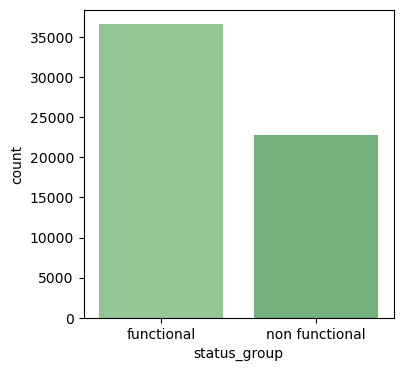

In [19]:
#checking for outliers in status_group

# Set the color palette
sns.set_palette("Greens_d")

# Plot the count plot for status_group
plt.figure(figsize=(4, 4))

sns.countplot(x='status_group', data=new_df)

# Display the plot
plt.show()

There are no outliers in the status group

#### Funder

In [20]:
unique_values = new_df['funder'].unique()
value_counts = new_df['funder'].value_counts()
value_counts

funder
Government Of Tanzania    9084
NaN                       3637
Danida                    3114
Hesawa                    2202
Rwssp                     1374
                          ... 
Rarymond Ekura               1
Justine Marwa                1
Municipal Council            1
Afdp                         1
Samlo                        1
Name: count, Length: 1897, dtype: int64

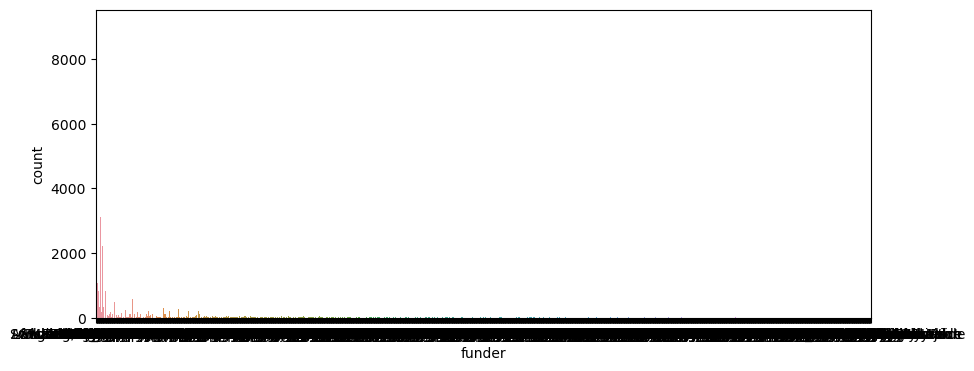

In [21]:
#checking for outliers in funder using a count plot
plt.figure(figsize=(10, 4))

sns.countplot(x='funder', data=new_df)
# Display the plot
plt.show()

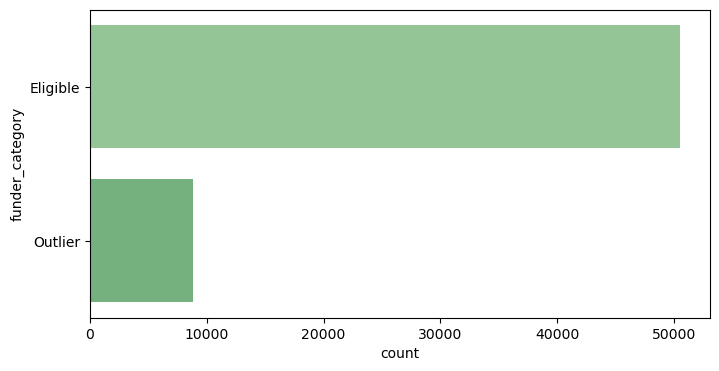

In [22]:
# Set the threshold for defining outliers
upper_threshold = 50

# Getting the counts of each funder
funder_counts = new_df['funder'].value_counts()

# Identifying the outliers (funders with counts below 50)
outliers = funder_counts[funder_counts < upper_threshold].index

# Create a new column to categorize funders as eligible or outliers
new_df['funder_category'] = np.where(new_df['funder'].isin(outliers), 'Outlier', 'Eligible')

# Set the color palette
sns.set_palette("Greens_d")

# Plot the count plot for funder category
plt.figure(figsize=(8, 4))
sns.countplot(y='funder_category', data=new_df, dodge=False)

# Display the plot
plt.show()





##### Eligible Funders vs. Outliers

The count plot above illustrates the distribution of funders categorized as "Eligible" and "Outlier" based on the specified thresholds. Here's a summary of the findings:

- **Eligible Funders:** These are funders with a count falling within the specified thresholds (between 10 and 600).
- **Outliers:** These are funders with a count below 10 or above 600.

As observed in the plot, the number of outliers is significantly higher than the count of eligible funders. However, it's important to note that we cannot disregard the outliers as they may contain valuable insights or represent specific cases of interest.



#### GPS height

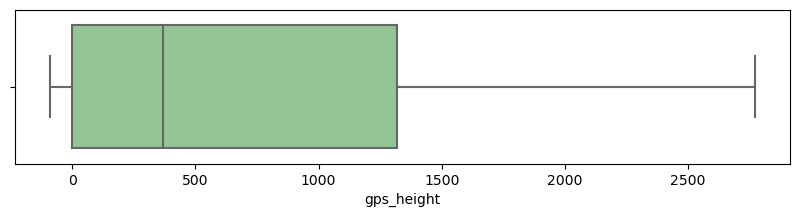

In [23]:
#checking for outliers for gps_height
plt.figure(figsize=(10,2))

sns.boxplot(x = 'gps_height', data = new_df)

# Display the plot
plt.show()

The whisker on the right side (upper whisker) of a box plot is longer than the whisker on the left side (lower whisker). It suggests that the upper range of the data (maximum) is more dispersed or variable compared to the lower range (minimum). This could indicate the presence of outliers or extreme values towards the higher end of the data distribution, potentially affecting the overall distribution towards higher values.
However, the outliers cannot simply be removed because they might represent genuine data points(gps_height). Removing them indiscriminately could lead to loss of important information and might bias the analysis or conclusions drawn from the data.


#### Region

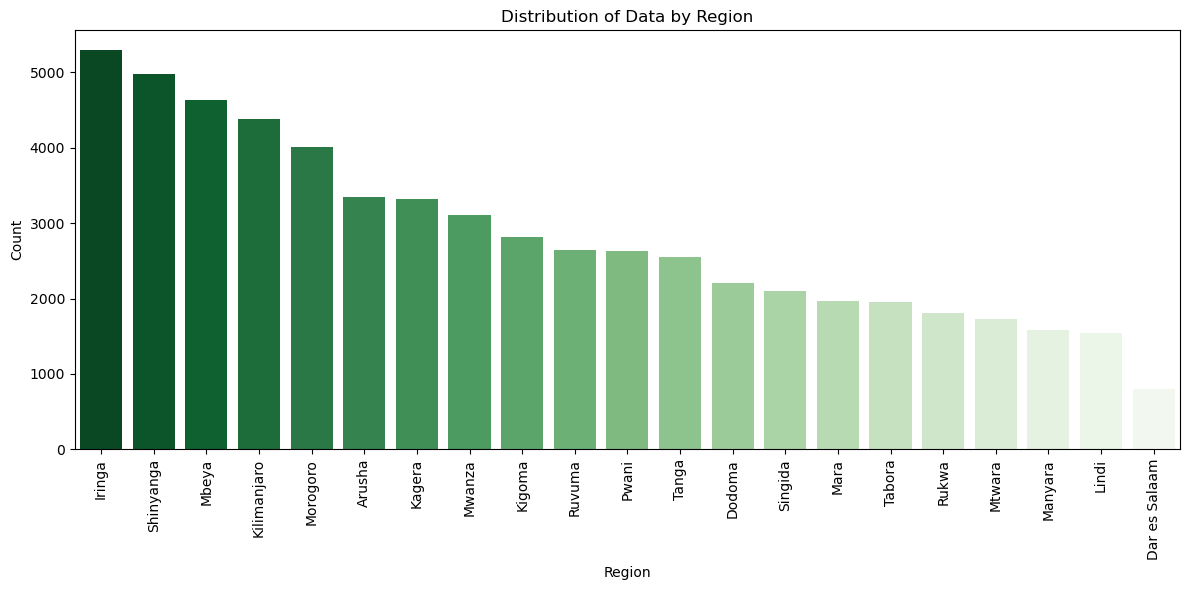

In [24]:
# Get the order of regions based on their counts
region_order = new_df['region'].value_counts().index

# Plot the count plot with specified order
plt.figure(figsize=(12, 6))
sns.countplot(x='region', data=new_df, order=region_order, palette='Greens_r')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Region')  # Add x-axis label
plt.ylabel('Count')  # Add y-axis label
plt.title('Distribution of Data by Region')  # Add plot title
plt.tight_layout()  # Adjusting layout to prevent clipping of labels
plt.show()


#### Population

In [25]:
population_counts = new_df['population'].value_counts().sort_values(ascending=False)

# Display unique values in 'Extraction_type' with counts
print(population_counts)


population
0       21381
1        7025
200      1940
150      1892
250      1681
        ...  
694         1
713         1
343         1
1054        1
788         1
Name: count, Length: 1049, dtype: int64


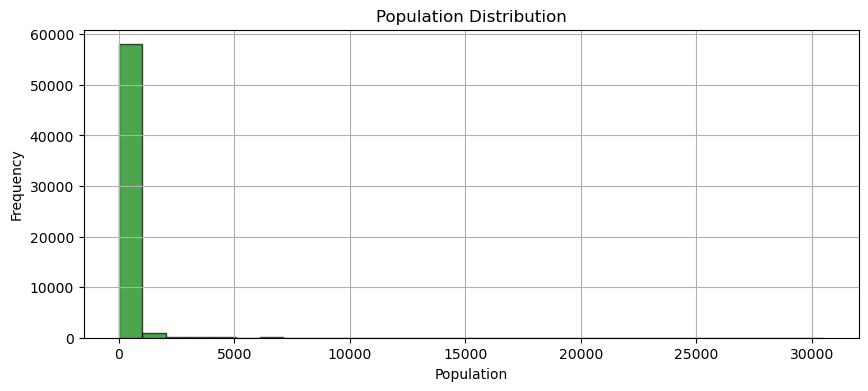

In [26]:
# Plot histogram to show distribution of the population data with 'Greens_r' palette
plt.figure(figsize=(10, 4))
plt.hist(new_df['population'], bins=30, color='green', edgecolor='black', alpha=0.7)
plt.title('Population Distribution')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


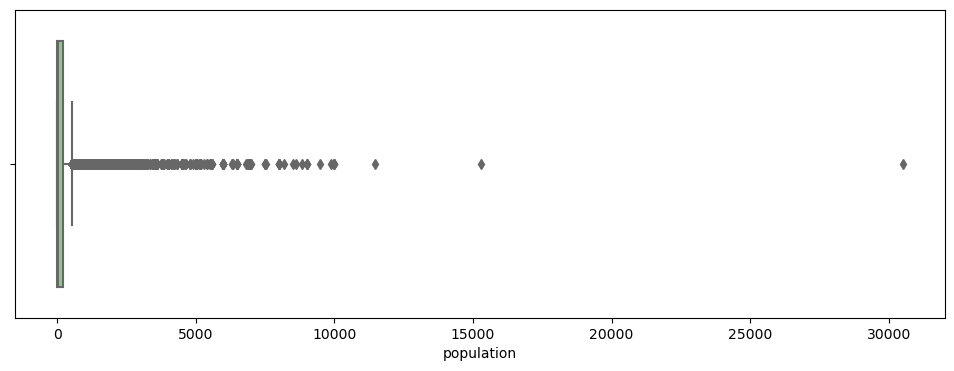

In [27]:
#checking for outliers for population
plt.figure(figsize=(12,4))

sns.boxplot(x = 'population', data = new_df)

# Display the plot
plt.show()

#### Extraction_type 

In [28]:
new_df['extraction_type'].unique()

array(['gravity', 'submersible', 'swn 80', 'nira/tanira', 'india mark ii',
       'other', 'ksb', 'mono', 'windmill', 'afridev', 'other - rope pump',
       'india mark iii', 'other - swn 81', 'other - play pump', 'cemo',
       'climax', 'walimi', 'other - mkulima/shinyanga'], dtype=object)

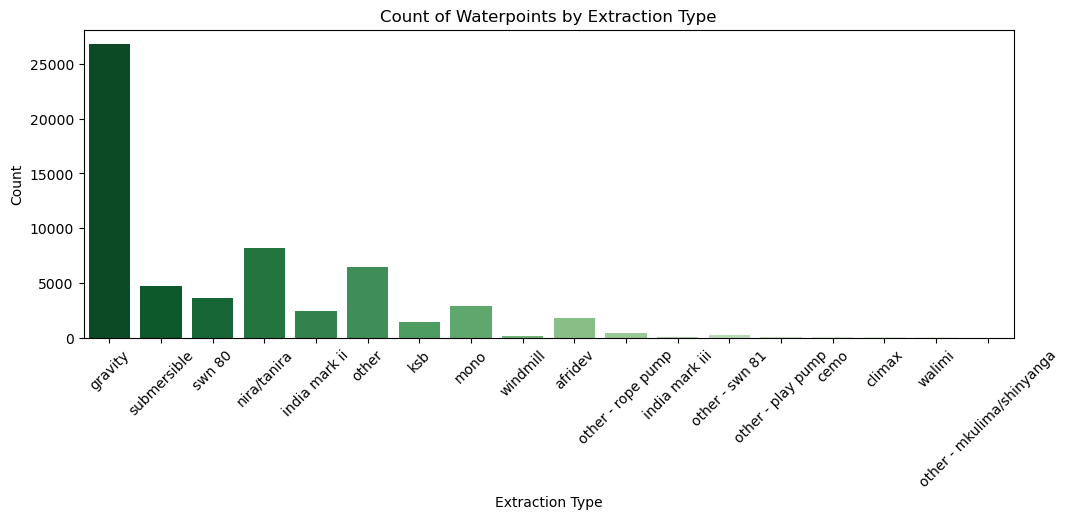

In [29]:
#checking for outliers in Extraction_type
sns.set_palette("Greens_r")

# Plot the count plot for Extraction_type
plt.figure(figsize=(12, 4))
sns.countplot(x='extraction_type', data=new_df, palette='Greens_r')
plt.xticks(rotation=45)  # Rotate the x-axis labels by 45 degrees
plt.title('Count of Waterpoints by Extraction Type')
plt.xlabel('Extraction Type')
plt.ylabel('Count')
# Display the plot
plt.show()

In [30]:
# Get value counts of 'Extraction_type' and sort by counts in descending order
extraction_type_counts = new_df['extraction_type'].value_counts().sort_values(ascending=False)

# Display unique values in 'Extraction_type' with counts
print(extraction_type_counts)


extraction_type
gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: count, dtype: int64


In the 'Extraction_type' column, the majority of water pumps fall into the following categories:

Gravity: 26,780 pumps
Nira/Tanira: 8,154 pumps
Other: 6,430 pumps
Submersible: 4,764 pumps
Swn 80: 3,670 pumps
Mono: 2,865 pumps
India Mark II: 2,400 pumps
Afridev: 1,770 pumps
KSB: 1
,415 pumps
However, there are some categories with notably fewer pumps, such as 'Other - Rope Pump', 'Other - Swn 81', 'Windmill', 'India Mark III', 'CEMO', 'Other - Play Pump', 'Walimi', 'Climax', and 'Other - Mkulima/Shinyanga'. These could be outliers regardingin terms of pump d. This couldstributie indicating less common or specialized therefore we cannot simply remove them as they may hold significance in the dataset.pump types.

#### Construction year

In [31]:
new_df['construction_year'].value_counts()

construction_year
0       20709
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1980      811
1996      811
1984      779
1982      744
1994      738
1972      708
1974      676
1997      644
1992      640
1993      608
2001      540
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: count, dtype: int64

In [39]:
new_df['construction_year'].mode()

0    0
Name: construction_year, dtype: int64

In [35]:
# Count the number of missing values (0s) in the construction_year column
construction_year_counts = merged_df['construction_year'].value_counts()
missing_count = construction_year_counts[0] if 0 in construction_year_counts.index else 0

# Calculate the number of non-missing years
non_missing_years = merged_df['construction_year'][merged_df['construction_year'] != 0]

# Calculate the number of years excluding missing values
num_years = len(non_missing_years)

# Calculate the number of times to evenly distribute the missing values
num_times = missing_count // num_years

# Calculate the remainder of missing values after evenly distributing
remainder = missing_count % num_years

# Create a list of years to distribute the missing values
years = non_missing_years.unique()

# Distribute the missing values evenly across the years
for year in years:
    merged_df.loc[merged_df['construction_year'] == 0, 'construction_year'] = year

# Handle the remainder of missing values
if remainder > 0:
    merged_df.loc[merged_df['construction_year'] == 0, 'construction_year'] = np.random.choice(years, remainder)




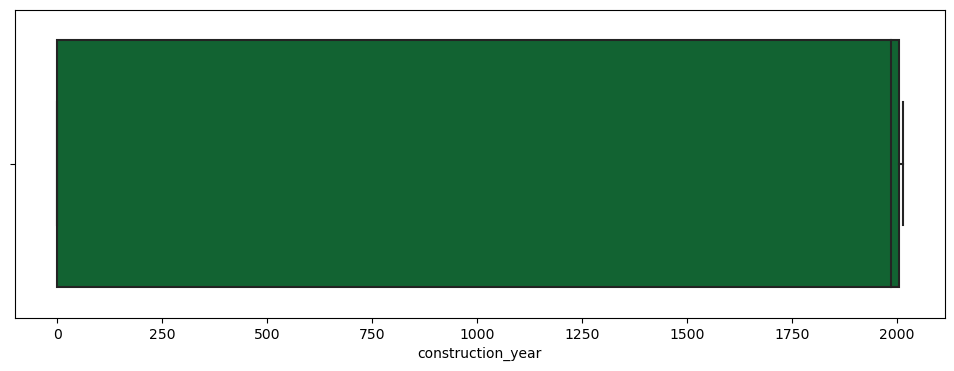

In [36]:
#checking for outliers for construction_year
plt.figure(figsize=(12,4))

sns.boxplot(x = 'construction_year', data = new_df)

# Display the plot
plt.show()

## Exploratory data analysis

In [ ]:
# A correlation heat map between variables
numerical_features = merged_df.select_dtypes(include=['int64', 'float64'])
target_variable = new_df['status_group']  # status_group being the target variable

# Computing correlation matrix
correlation_matrix = numerical_features.corr()

# Ploting heatmap of correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Greens', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Define the list of categorical columns
categorical_columns = ['status_group', 'funder', 'region', 'extraction_type', 'payment', 'water_quality', 'source', 'quantity', 'ward', 'funder_category']

In [ ]:
# One-hot encode categorical columns
encoded_columns = pd.get_dummies(new_df[categorical_columns])
new_df.head()

In [ ]:
# Concatenate the one-hot encoded columns with the original DataFrame
selected_df = pd.concat([new_df, encoded_columns], axis=1)

In [ ]:
# Drop the original categorical columns
selected_df.drop(columns=categorical_columns, inplace=True)
selected_df.columns

In [ ]:
# Convert 'status_group' to numerical using one-hot encoding
status_group_encoded = pd.get_dummies(merged_df['status_group'])

# Concatenate the encoded 'status_group' with numerical features
numerical_features_with_status = pd.concat([numerical_features, status_group_encoded], axis=1)

# Calculate correlation coefficients
correlation_coefficients_with_status = numerical_features_with_status.corr()

# Filter correlation coefficients for 'status_group'
status_group_correlation = correlation_coefficients_with_status['functional'].drop('functional')

# Print the top correlations with 'status_group'
print(status_group_correlation.head(20))



### Distribution before log transformation

In [ ]:
# Specify the columns of interest
selected_columns = ['status_group', 'funder', 'region', 'extraction_type', 'payment', 'water_quality', 'source', 'quantity', 'construction_year', 'longitude', 'latitude', 'ward']

# Filter the DataFrame to include only the selected columns
selected_df = merged_df[selected_columns]

# Define a green color palette with shades of green
green_palette = sns.color_palette("Greens", as_cmap=True)

# Plot the distribution of categorical features
for feature in selected_df.select_dtypes(include=['object']).columns:
    if len(selected_df[feature].unique()) <= 20:  # Limiting to columns with up to 20 unique categories
        sns.countplot(x=feature, data=selected_df)
        plt.title(f"Distribution of {feature}")
        plt.xlabel(feature)
        plt.ylabel("Count")
        plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
        plt.show()



In [ ]:
# Distribution before transformation
numerical_features = new_df.select_dtypes(include=['int64', 'float64'])

# Plot the distribution of numerical features
for feature in numerical_features.columns:
    sns.distplot(new_df[feature].dropna(), kde=False)
    plt.gca().set_yticklabels(plt.gca().get_yticks().astype(int))
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

In [ ]:
numerical_features = merged_df.select_dtypes(include=['int64', 'float64'])
num_features_to_plot = min(10, len(numerical_features.columns))  # Limit to 10 features
selected_features = random.sample(list(numerical_features.columns), num_features_to_plot)

# Plot the distribution of selected numerical features
for feature in selected_features:
    sns.histplot(merged_df[feature].dropna(), kde=False)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

In [ ]:
# Group by 'status_group' and 'source', then compute the size of each group
value_counts_df = merged_df.groupby(['status_group', 'source']).size().unstack(fill_value=0)

# Display the DataFrame
value_counts_df



In [ ]:
import matplotlib.pyplot as plt

# Plot the stacked bar plot
value_counts_df.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add labels and title
plt.xlabel('Status Group')
plt.ylabel('Count')
plt.title('Count of Status Group by Source')

# Display the plot
plt.show()


In [ ]:
df2 = pd.read_csv('test_set_values.csv')
df2

In [ ]:
# checking for duplicates in the test set
df2.duplicated().sum()

There are no duplicates in the test set

In [ ]:
# checking for missing values in the test set
df2.isnull().sum()